<a href="https://colab.research.google.com/github/MiroxDot/Projects/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import tensorflow as tf

In [3]:
# Load the MNIST dataset from TensorFlow's Keras API.
mnist = tf.keras.datasets.mnist

In [4]:
# Load the MNIST dataset into training and testing sets using the load_data() method.
# This returns two tuples: (x_train, y_train) contains the training images and labels,
# and (x_test, y_test) contains the testing images and labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77 254
  107   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 227 254
  254   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 254 254
  165   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 20

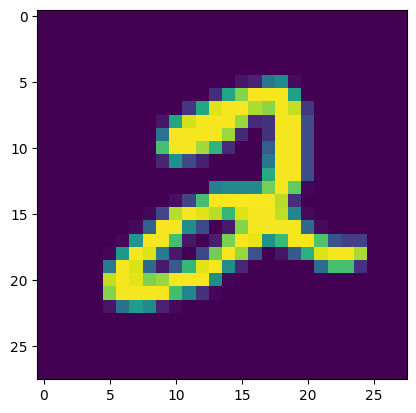

In [5]:
# Import the matplotlib.pyplot module for plotting graphs and images
import matplotlib.pyplot as plt

# Display the 6th image in the training dataset using matplotlib's imshow function.
# The image is a 28x28 pixel grayscale image of a handwritten digit.
plt.imshow(x_train[5])

# Print the pixel values of the 6th image in the test dataset to the console.
# This will display a 28x28 array of integers, each representing a grayscale value.
print(x_test[5])

In [6]:
# Normalize the pixel values of training images to enhance model training efficiency.
x_train = tf.keras.utils.normalize(x_train, axis=1)

# Normalize the pixel values of test images to match the scale of training data.
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
# Import the sparse_categorical_crossentropy from Keras backend
from keras.src.backend import sparse_categorical_crossentropy
# Initialize a sequential model to add layers in a feed-forward manner
model = tf.keras.models.Sequential()
# Add a flatten layer to convert 2D images to 1D vectors
model.add(tf.keras.layers.Flatten())
# Add the first dense layer with 128 neurons and ReLU activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Add the second dense layer with 128 neurons and ReLU activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Add the output layer with 10 neurons (one for each digit) and softmax activation function for multi-class classification
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# Compile the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model on the training data with labels for 8 epochs
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2575 - accuracy: 0.9254
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1030 - accuracy: 0.9677
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0707 - accuracy: 0.9773
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9826
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9869
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9925


In [8]:
# Evaluate the model on the test dataset to determine the loss and accuracy.
# 'val_loss' captures the loss value, and 'val_acc' captures the accuracy of the model on the test data.
val_loss, val_acc = model.evaluate(x_test, y_test)

# Print the loss and accuracy obtained from the model evaluation on the test data.
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9755
0.09909656643867493 0.9754999876022339


In [9]:
# Save the trained model to a file named 'num_lab.model' for later use or deployment.
model.save('num_lab.model')

In [10]:
# Load the previously saved model from 'num_lab.model' into 'new_model' for use in further predictions or analysis.
new_model = tf.keras.models.load_model('num_lab.model')

In [11]:
# Use the loaded model 'new_model' to make predictions on the test dataset 'x_test'.
# The predict method outputs the probability distributions across the 10 classes for each input image.
predictions = new_model.predict([x_test])

# Print the output predictions array, which shows the probabilities for each class of each test image.
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[1.3331050e-13 6.8306100e-10 7.7131551e-10 ... 9.9999994e-01
  1.2771467e-12 9.4120045e-10]
 [1.3278075e-13 8.6822570e-07 9.9999875e-01 ... 2.6004128e-11
  6.8459799e-10 3.1325391e-16]
 [1.0832346e-11 9.9994963e-01 1.0087907e-07 ... 7.7157119e-06
  4.1176390e-05 8.2066647e-09]
 ...
 [1.7408400e-13 3.1857569e-10 5.8550864e-15 ... 1.6420014e-08
  6.2509270e-10 2.2496458e-07]
 [8.5771064e-11 1.0783715e-11 2.3347455e-12 ... 4.2866297e-11
  9.8067132e-05 5.6492761e-13]
 [1.0476447e-12 3.7285895e-12 4.3555180e-14 ... 1.9303390e-15
  7.3151422e-11 4.2965349e-16]]


In [12]:
# Import the numpy library for numerical operations
import numpy as np

# Find the index of the maximum value in the predictions array for the 8th test image.
# This index corresponds to the class label predicted by the model for that particular image.
print(np.argmax(predictions[7]))

9


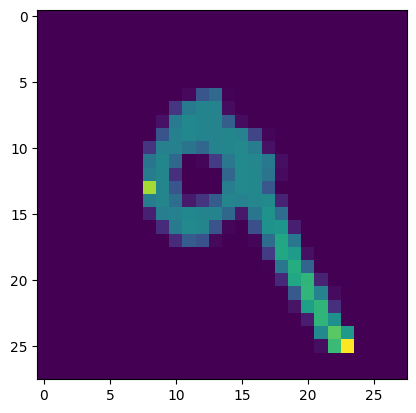

In [13]:
# Display the 8th image from the test dataset using matplotlib's imshow function.
# The imshow function renders the image in a window.
plt.imshow(x_test[7])

# Show the plot window with the image. This is necessary to actually display the plotted image when not in an interactive environment.
plt.show()